In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 1.6MB 62.3MB/s 
     |████████████████████████████████| 890kB 81.1MB/s 
     |████████████████████████████████| 3.0MB 60.7MB/s 
     |████████████████████████████████| 317kB 68.5MB/s 
     |████████████████████████████████| 7.2MB 19.4MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 163kB 61.8MB/s 
     |████████████████████████████████| 122kB 73.4MB/s 
     |████████████████████████████████| 1.1MB 76.1MB/s 
     |████████████████████████████████| 890kB 82.2MB/s 
     |████████████████████████████████| 112kB 66.0MB/s 
     |████████████████████████████████| 4.4MB 68.4MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
     |████████████████████████████████| 122kB 64.4MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.1

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

import json

In [ ]:
ROOT_PATH = "/content/drive/My Drive/Magíster 2020"

In [ ]:
puc_train = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puc_train_70.json", orient="records")
puc_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puc_test_30.json", orient="records")

puj_train = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puj_train_70.json", orient="records")
puj_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puj_test_30.json", orient="records")

aurora_train = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/aurora_train_70.json", orient="records")
aurora_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/aurora_test_30.json", orient="records")

train = pd.concat([puc_train, puj_train, aurora_train], ignore_index=True)
test = pd.concat([puc_test, puj_test, aurora_test], ignore_index=True)

In [ ]:
train["first_sdg"] = train["first_sdg"] - 1 
test["first_sdg"] = test["first_sdg"] - 1 

In [ ]:
train = train[["clean_abstract", "first_sdg"]]
test = test[["clean_abstract", "first_sdg"]]

In [ ]:
train.head()

,clean_abstract,first_sdg
0,Objective. To assess gender differences in bod...,2
1,"In this review, we provide a general and clear...",8
2,Abstract Teachers' first employment is key to ...,3
3,Reclaimed water is receiving growing attention...,5
4,The phenomenological method comes to be an imp...,3


In [ ]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average="micro")

def precision_multiclass(labels, preds):
    return precision_score(labels, preds, average="micro")

def recall_multiclass(labels, preds):
    return recall_score(labels, preds, average="micro")

In [ ]:
model_args = {
                "learning_rate": 1e-5,
                "num_train_epochs": 2,
                "reprocess_input_data": True,
                "overwrite_output_dir": True,
                "train_batch_size": 1,
                "eval_batch_size": 1,
                "max_seq_length": 512
              }


In [ ]:
model = ClassificationModel(
    "roberta", "roberta-large", num_labels=len(train["first_sdg"].unique()), args=model_args
)
model.train_model(train)

predictions = model.predict(test["clean_abstract"])[0].tolist()

with open(f"{ROOT_PATH}/Ordenado/simpletransformers_results/2020-09-20_roberta_predictions.json", "w") as f:
    json.dump(predictions, f) 

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.o

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WA

In [ ]:
predictions = model.predict(test["clean_abstract"])[0].tolist()

In [ ]:
predictions = [pred + 1 for pred in predictions]
train["first_sdg"] = train["first_sdg"] + 1
test["first_sdg"] = test["first_sdg"] + 1

In [ ]:
print(classification_report(test["first_sdg"], predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.54      0.51      0.52        75
           3       0.88      0.93      0.91       800
           4       0.86      0.80      0.83       205
           5       0.74      0.77      0.75       128
           6       0.72      0.73      0.72        91
           7       0.63      0.67      0.65       110
           8       0.44      0.24      0.31        34
           9       0.58      0.42      0.48       137
          10       0.62      0.65      0.63        81
          11       0.65      0.75      0.70       142
          12       0.53      0.51      0.52       106
          13       0.49      0.52      0.51       117
          14       0.59      0.65      0.62        60
          15       0.62      0.65      0.64       155
          16       0.74      0.67      0.70       113
          17       0.58      0.56      0.57        45

    accuracy              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


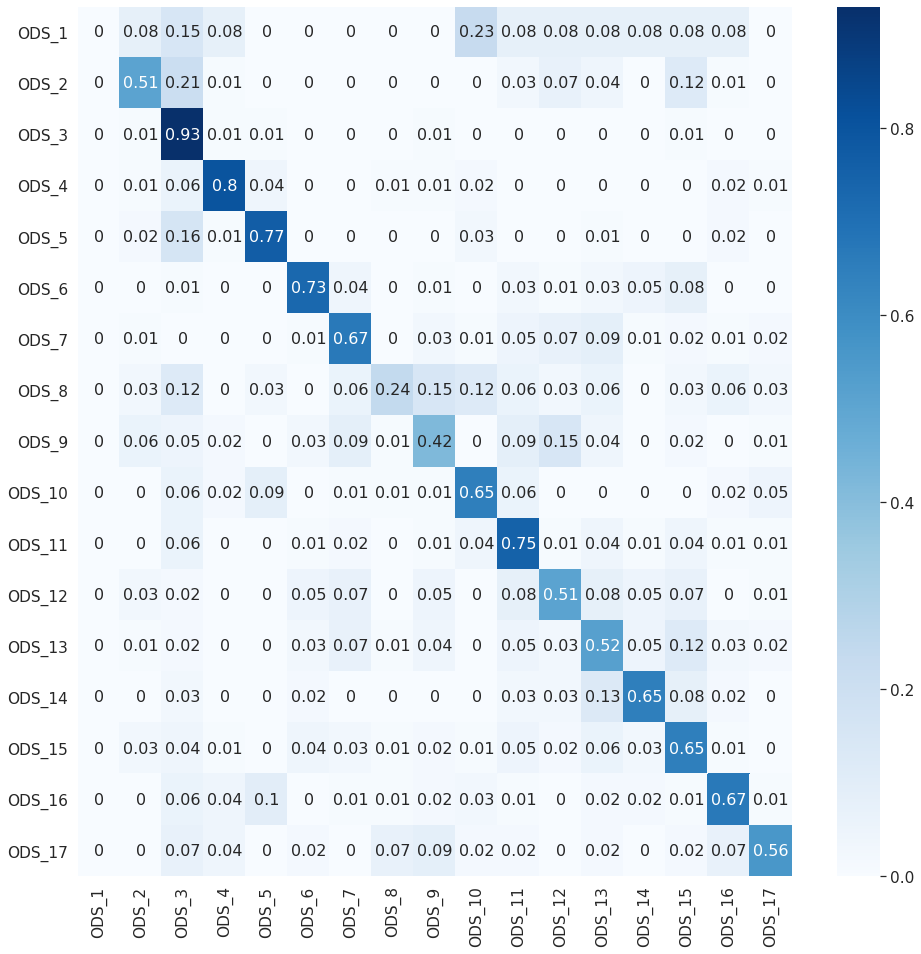

In [ ]:
conf_matrix = confusion_matrix(test["first_sdg"], predictions, labels=range(1, 18), normalize="true")
sdg_index = [f"ODS_{i}" for i in range(1, 18)]
df_cm = pd.DataFrame(conf_matrix, columns=sdg_index, index=sdg_index)
df_cm = df_cm.round(2)
plt.figure(figsize=(16,16))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
plt.show()